# LIBRERIE PRINCIPALI
Si tratta di librerie/moduli/file esterni che possiamo implementare nel nostro programma. Un esempio banale é un programma scritto da noi con delle funzioni definite e che noi andiamo a richiamare in un altro programma (in questo caso tale file esterno sarà in formato '.py'). Altri esempi sono librerie note come Numpy, Matplotlib, Pandas ecc

# NUMPY
É una libreria che introduce gli array e il cacolo tra di essi velocizzato, fondamentale in matematica. We import it using `import numpy as np`. It contains, among other things:

  * a powerful N-dimensional array object
  * sophisticated operations on arrays
  * tools for integrating C/C++ and Fortran code (not covered in the course)
  * (pseudo-)random number generation (today? if not in the next lectures)
  * linear algebra, Fourier transform, ... (in the next lectures)

Numpy features a very detailed [documentation](https://numpy.org/doc/stable/user/whatisnumpy.html), with clear examples too.

NOTA: In NumPy, l'asse (axis) è un concetto che si riferisce alla direzione lungo cui viene eseguita un'operazione su un array multidimensionale.
Spiegazione degli assi:

* axis=0: Indica l'asse verticale (lungo le righe) in una matrice 2D. Quando usi axis=0, l'operazione viene eseguita lungo le colonne. Ad esempio, se sommi lungo axis=0, si sommano gli elementi per ogni colonna.
* axis=1: Indica l'asse orizzontale (lungo le colonne) in una matrice 2D. Quando usi axis=1, l'operazione viene eseguita lungo le righe.

### COMANDI PRINCIPALI
* `np.array(oggetto)`: trasforma un oggetto (lista, tupla...) in un array di numpy
* `np.arange(start, stop, step)`: crea array con sequenza di numeri distanziati dalla quantità step
* `np.linspace(start, stop, tot)`: serve a generare un array di tot numeri equidistanti su un intervallo specificato
* `np.zeros(shape)`: crea un array di dimensioni specificate (vuole una tupla in input), riempiendolo di 0.
* `np.ones(shape)`: crea un array di dimensioni specificate (vuole una tupla in input), riempiendolo di 1.
* `np.identity(dim)`: crea una matrice identità di dimensioni (dim)x(dim). Similmente fa *np.eye(dim)*
* `np.diag(input)`: se l'input è un array 1D, crea una matrice sulla cui diagonale ci sono gli elementi dell'array; se l'input è una matrice, crea un array 1D con dentro gli elementi che erano sulla diagonale
* `nome_array.shape()`: restituisce la lunghezza di ogni dimensione (in una tupla)
* `nome_array.ndim()`: restituisce il numero delle dimensioni dell'array (1D, 2D, 3D, ecc)
* `np.fromfunction(function, shape)`: crea un array applicando una funzione specificata a ciascuna posizione (indice) del nuovo array


NOTA: ora per sapere con che oggetti si ha a che fare si hanno a disposizione 2 funzioni. Il solito `type()` mi dice con che oggetto ho a che fare (stringa, array numpy...), il nuovo `dtype` mi dice di che tipo sono gli oggetti dentro il mio array (bool, float, complex, stringhe...).

Per ritrasformare un array numpy in una lista python serve il metodo `nome_array.tolist()`, poichè usando il solito *list(nome_array)* in caso di più dimensioni restituisce una lista di array numpy invece che una lista di liste.

In [43]:
import numpy as np

# creazione array
arr = np.array([1,2,3,4,5])            # prende la lista di input e la trasforma in numpy array
a = np.array([1, 2, 3], dtype='float64')     # per specificare il tipo
print(a.dtype)

arr0 = np.array(42)                    # definizione di uno scalare (array di zero dimensioni)
arr0_5 = np.array([42])                # definizione di un array di una dimensione con un solo elemento dentro
print(arr0.shape)
print(arr0_5.shape)

# creiamo array di piú dimensioni (matrici)
arr1 = np.array([1,2,3,4,5])           # array di 1 dimensione (vettore)
arr2 = np.array([  [1,2,3,4,5], 
                   [6,7,8,9,10]  ])    # array 2D (matrice)
arr3 = np.array([      [[1,2] , [3,4] ] ,      [[5,6] , [7,8] ]            ])              # array 3D (tensore)
arr5 = np.array([1,2,3], ndmin=5)      # creazione automatica di array 5D (occhio che é 'ndmin' non 'ndim')
# per creare in modo automatizzato degli array si puó usare:
arr_a = np.arange(2, 50, 5)            # array dei numeri da 2 a 50 (escluso) a passi di 5
arr_b = np.zeros( (3,2) )              # array 3x2 di zeri
arr_c = np.ones( (3,4,2) )             # array 3x4x2 con tutti valori 1

# definition from list comprehensions
array = np.array([(i, j) for i in range(2) for j in range(3)])
print(array, '\n')

# definition from a function
fromfunct = np.fromfunction(lambda i, j: (i - 2)**2 + (j - i)**2, (5, 5))
print(fromfunct, '\n')

float64
()
(1,)
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]] 

[[ 4.  5.  8. 13. 20.]
 [ 2.  1.  2.  5. 10.]
 [ 4.  1.  0.  1.  4.]
 [10.  5.  2.  1.  2.]
 [20. 13.  8.  5.  4.]] 



Un comando molto utile per caricare dati da file esterni txt, csv ecc è: 

`np.loadtxt(file_name, dtype=float, comments='#', delimiter, skiprows, usecols)`: carica dati da un file di testo in un array NumPy. Con comments indico quali righe saltare (poichè da leggere come commenti), con delimiter il separatore tra le cifre, con skiprows quante righe iniziali saltare, con usecols specifico quali colonne deve leggere. Esempio:
```python
# Carica dati da un file CSV con valori separati da virgole
data = np.loadtxt("data.csv", delimiter=",")
# Carica solo le prime due colonne, saltando la prima riga e considerando le righe che iniziano con '#' come commenti
data = np.loadtxt("data.txt", skiprows=1, usecols=(0, 1), comments="#")
years, money = data.T # trick: columns to variables
```

Altri comandi utili: 
* `nome_array.reshape(new_shape)`: restituisce un array (come view!!) con forma *new_shape* rimodellando quello precedente
* `nome_array.flatten()`: restituisce una (deep) copy dell'array originale trasformandolo in un array 1D, indipendentemente dalla sua forma iniziale
* `nome_array.copy()`: restituisce una (deep) copy dell'array originale
* `np.concatenate(arr1, arr2, ...)`: concatena gli array in un unico lungo array (o comunque nella stessa dimensione)
* `np.stack(arr1, arr2, ...)`: unisce gli array in un nuovo array di array (ovvero creando una nuova dimensione)

Nota: with numpy objects, the `id()` function (to know if two objects are the same object) does not always work. To check whether two variables point to the same PyObject, use `np.may_share_memory(a, b)`.

In [12]:
arr_d = arr0.copy()                 # per creare la copia di un array

# per scorrere gli elementi:
for x in np.nditer(arr2):    # con 'nditer' scorro automaticamente i singoli elementi
    print(x)

# per stampare gli indici degli array si usa 'ndenumerate' e un indice in piú nel 'for':
for idx, x in np.ndenumerate(arr2):
    print(idx, x)
    
# per UNIRE due array (che abbiano la stessa dimensione):
arr_a = np.array([1,2,3])
arr_b = np.array([4,5,6])
arr_c = np.concatenate((arr_a, arr_b))            # cosi li unisco sulla stessa dimensione (che é la primna essendo sottinteso axis=0)
#arr_d = np.concatenate((arr_a, arr_b), axis=1 )  # cosi li unisco sulla seconda dimensione (solo se c'é una seconda dimensione ovviamente)
arr_c = np.stack((arr_a, arr_b))                  # cosi li unisco in una nuova dimensione, cioe il nuovo array avrá una dimensione in piu

# con hstack, vstack, dstack specifico io su quale dimensione volgio unire (horizontal=0, vertical=1, depth=2)
# con 'split' si puó anche spezzare in piú parti un array

# per CERCARE un elemento su un array si usa 'where':
arr_ricerca = np.where(arr_a == 3)        # cerco l'elemento '3' in 'arr_a' e mi restituisce l'indice a cui lo trovo
arr_ricerca_1 = np.where(arr_a %2 == 0)     # cerco tutti gli elementi pari (cioé a resto nullo)

# 'np.where' si usa anche per eguagliare tramite condizione. La sintassi é:
#                 'np.where(condition, x, y)' che restituisce un array composto da elementi presi da x dove la condition è vera, e da y dove la condition è falsa
#La funzione 'np.argwhere' restituisce gli indici degli elementi che soddisfano una condizione specificata, tipo 'nome_indici = np.argwhere( condizione )'
     # ma occhio che restituisce un array fatto di array unidimensionali con dentro gli indici, cioé insomma resistuisce qualcosa di bidimensionale
# 'np.max(nome_array)' restituisce il valore massimo tra quelli di un array

# per ORDINARE gli elementi di un array si usa 'sort':
arr_ordinato = np.sort(arr_a)

# per filtrare velocemente:
filtro = arr % 2 == 0
arr_filtrato = arr[filtro]       # il nuovo array é formato dai soli elementi associati al True *cioé quelli pari in questo esempio)
print(arr_filtrato)


# 'np.empty( (dim1, dim2, ...)  )' viene utilizzato per creare un array di dimensioni specificate con valori non inizializzati, utile per risparmiare tempo nell'esecuzione

# le Universal FUNCtions sono funzioni proprie di numpy che posso definire anche io per poter agire su elementi non di numpy, ad esempio le liste:
# esempio:
numeri = [1,2,3,4,5]
def add_cinque(x):      # definisco qua una funzione che rendo propria di numpy tramite 'frompyfunc' cosí da poter fare cose di numpy anche con cose su cui non potrebbe, tipo liste
    return x + 5
add_cinque = np.frompyfunc(add_cinque, 1, 1)
# funzioni UFUNC proprie di numpy sono add (sommo elementi di un array), subtract, multiply, divide, power, mod (ci da il resto), trunc, floor, ceil ecc...

1
2
3
4
5
6
7
8
9
10
(0, 0) 1
(0, 1) 2
(0, 2) 3
(0, 3) 4
(0, 4) 5
(1, 0) 6
(1, 1) 7
(1, 2) 8
(1, 3) 9
(1, 4) 10
[ 8 18 28]


### SLICING
Lo **slicing** è praticamente il medesimo delle liste (e ci fa accedere tramite una view) con sintassi: `start:stop:step`

Con il **fancy indexing** invece accediamo agli array usando ad esempio delle maschere di booleani o interi. Ciò crea invece una copy.

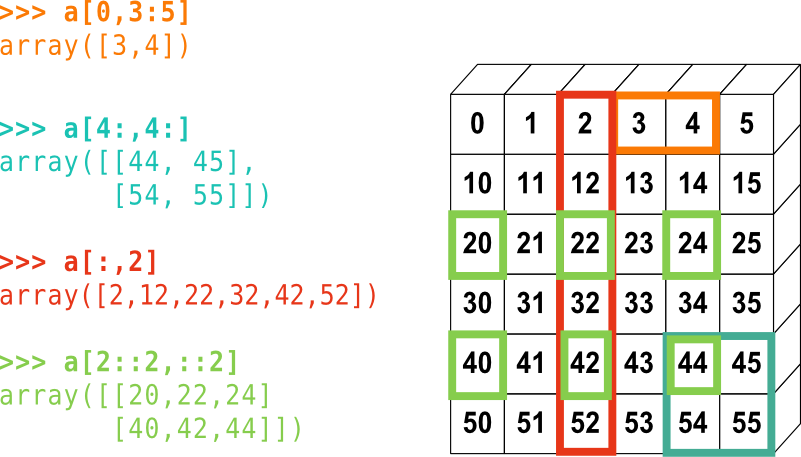

original array: [ 0  2  4  6  8 10 12 14 16 18 20] 

the mask: [ True False False  True False False  True False False  True False]
<class 'numpy.ndarray'> 

the filtered array: [ 0  6 12 18] 

selection of indexes:  [20 30 20 40 20] 

[[ 6  8]
 [18 14]]


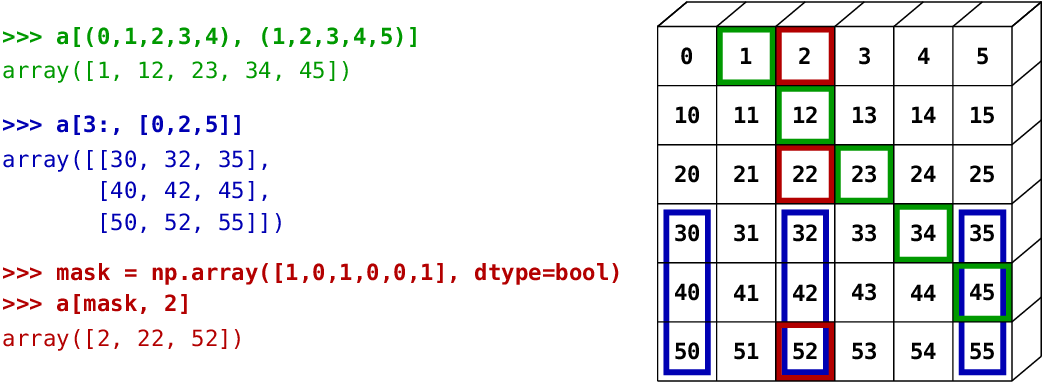

In [40]:
# SLICING:
arr1[3]                             # accedo al terzo elemento di arr1 (si conta da 0 come al solito)
arr1[-2]                            # accedo al penultimo elemento (si possono usare indici negativi!!)
arr2[0,2]                           # accedo all'elemento in prima riga e terza colonna di arr2
# per prendere piú elementi insieme:
arr1[0:2]                           # prendo gli elementi dal primo (compreso) al terzo (ESCLUSO)

# more advanced examples in the image:
from IPython.display import Image, display
display(Image("numpy_indexing.png", width=400))


# FANCY INDEXING:
a = np.arange(0, 21, 2)
print("original array:", a,'\n')

mask = (a % 3 == 0)    # array (numpy) di booleani
print("the mask:", mask)
print(type(mask),'\n') 

filtered_a = a[mask]
# equivalent to a[a%3==0]
print("the filtered array:", filtered_a,'\n')

# using integers instead of booleans:
a = np.arange(0, 100, 10)
l = [2, 3, 2, 4, 2] # l is a python list
print("selection of indexes: ", a[l], '\n')

# When a new array is created by indexing with an array of integers, the new array has the same shape as the array of integers:
a = np.arange(0, 20, 2)
idx = np.array([[3, 4],[9, 7]]) # note the shape and the ordering
print(a[idx])

# more advanced examples at:
display(Image("numpy_fancy_indexing.png", width=500))

### OPERATIONS WITH ARRAYS
By default, all aritmetic operations (additions +, subtractions -, multiplications *, ...) with arrays are performed element-wise!! To do things like matrix multiplications that require specific algorithms, we have to use proper numpy functions:
* `np.dot(a,b)`: restituisce il prodotto scalare tra due vettori, oppure il prodotto matriciale tra due matrici ( o il prodotto matrice-vettore)
* `np.array_equal(a, b)`: confronta due array e restituisce True se sono esattamente uguali (stesso tipo, forma e valori) e False altrimenti
* `np.logical_and(a, b)`: esegue un AND logico tra due array, operando elemento per elemento (similmente np.logical_or)
* `np.triu(M)`: estrae la parte triangolare superiore di una matrice, impostando tutti gli elementi al di sotto della diagonale principale a zero
* `nome_matrice.T`: restituisce una view alla matrice trasposta
* `np.meshgrid(a, b, c...)`: Crea griglie coordinate a partire da vettori unidimensionali, e ritorna una tupla di array multidimensionali contenenti le coordinate delle griglie. Utile per creare griglie di punti per visualizzare funzioni in 2D o 3D.

In fisica tipicamente al posto di equal si usa `np.allclose(a, b, rtol=1e-05, atol=1e-08)`, che determina se due array sono uguali elemento per elemento entro una certa tolleranza, dove a, b sono gli array da confrontare, rtol la tolleranza relativa, atol la tolleranza assoluta.

In [137]:
arr = np.array([1,2,3,4,5])

arr = arr*5                            # moltiplico tutti i valori dell'array per 5 (non si poteva fare con le liste!!)
arr = arr + 3                          # sommo 3 a tutti i valori dell'array (non si poteva fare con le liste!!)
arr = 2**arr                           # elevo a potenza di 2 ciascun elemento di arr

arr1 = np.array([1,2,3,4,5])
np.dot(arr, arr1)                      # scalar product

x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)

N.B.: a linear algebra package exists in numpy and is called `numpy.linalg`. However, in terms of performance, the package included in `scipy` (the library subject of a future class), also called `scipy.linalg`, is better and more efficient.

### REDUCTIONS

Operations that reduce the dimensionality of arrays are called *reductions*. The reduction functions operate on the elements of an array and return a (set of) scalar(s), and are available either as methods of the array class or as numpy functions. 
In dimensions higher than one, the axis has to be specified.

Eccone alcune:
* `np.sum()`: Restituisce la somma degli elementi lungo un asse o di tutto l'array.
* `np.max()`: Restituisce il valore massimo tra gli elementi dell'array (similmente *np.min()* ).
* `np.argmin()`: Restituisce l'indice dell'elemento con il valore minimo nell'array.
* `np.argmax()`: Restituisce l'indice dell'elemento con il valore massimo nell'array.
* `np.mean()`: Restituisce la media aritmetica degli elementi lungo un asse o di tutto l'array.
* `np.median()`: Restituisce la mediana degli elementi lungo un asse o di tutto l'array.
* `np.std()`: Restituisce la deviazione standard degli elementi lungo un asse o di tutto l'array.

In [57]:
a = np.arange(1,7)
print(a)
print("sum:", a.sum(), np.sum(a))
print("max:", a.max(), np.max(a))
print("median:", np.median(a)) # median is not a method of the array class..
print("standard deviation:", a.std(), np.std(a), '\n')

# in higher dimensions:
m = a.reshape(3,2)
print(m)
print("sum along the columns:", m.sum(axis=0))
print("sum along the rows:", m.sum(axis=1))

[1 2 3 4 5 6]
sum: 21 21
max: 6 6
median: 3.5
standard deviation: 1.707825127659933 1.707825127659933 

[[1 2]
 [3 4]
 [5 6]]
sum along the columns: [ 9 12]
sum along the rows: [ 3  7 11]


### BROADCASTING
We have seen element-wise operations on arrays, which work only on arrays of the same rank and shape. Nevertheless, it’s also possible to do operations on arrays of different sizes if NumPy can transform (broadcast) these arrays so that they all have the same size.

Useful commands:
* `np.tile(a, reps)`: Replica un array un numero specificato di volte lungo ogni asse (reps could be a tuple, meaning rows and columns repetitions)
* `np.newaxis`: permette di aggiungere nuove dimensioni a un array esistente, creando una nuova . Puoi posizionare np.newaxis ovunque all'interno dell'operazione di slicing per controllare dove viene inserita la nuova dimensione
* `np.resize(a, new_shape)`; Cambia la forma di un array a una forma specificata. È simile a *reshape*, ma qua se la nuova forma è più grande dell'originale, gli elementi vengono ripetuti per riempire la nuova forma. Se la nuova forma è più piccola, gli elementi in eccesso vengono troncati. Dunque è meno sicuro di reshape

Tiled array: 
 [[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]] 

(1, 3)
(1, 2, 2)
resizing: 
 [0 1 2 3 0 1 2 3 0] 



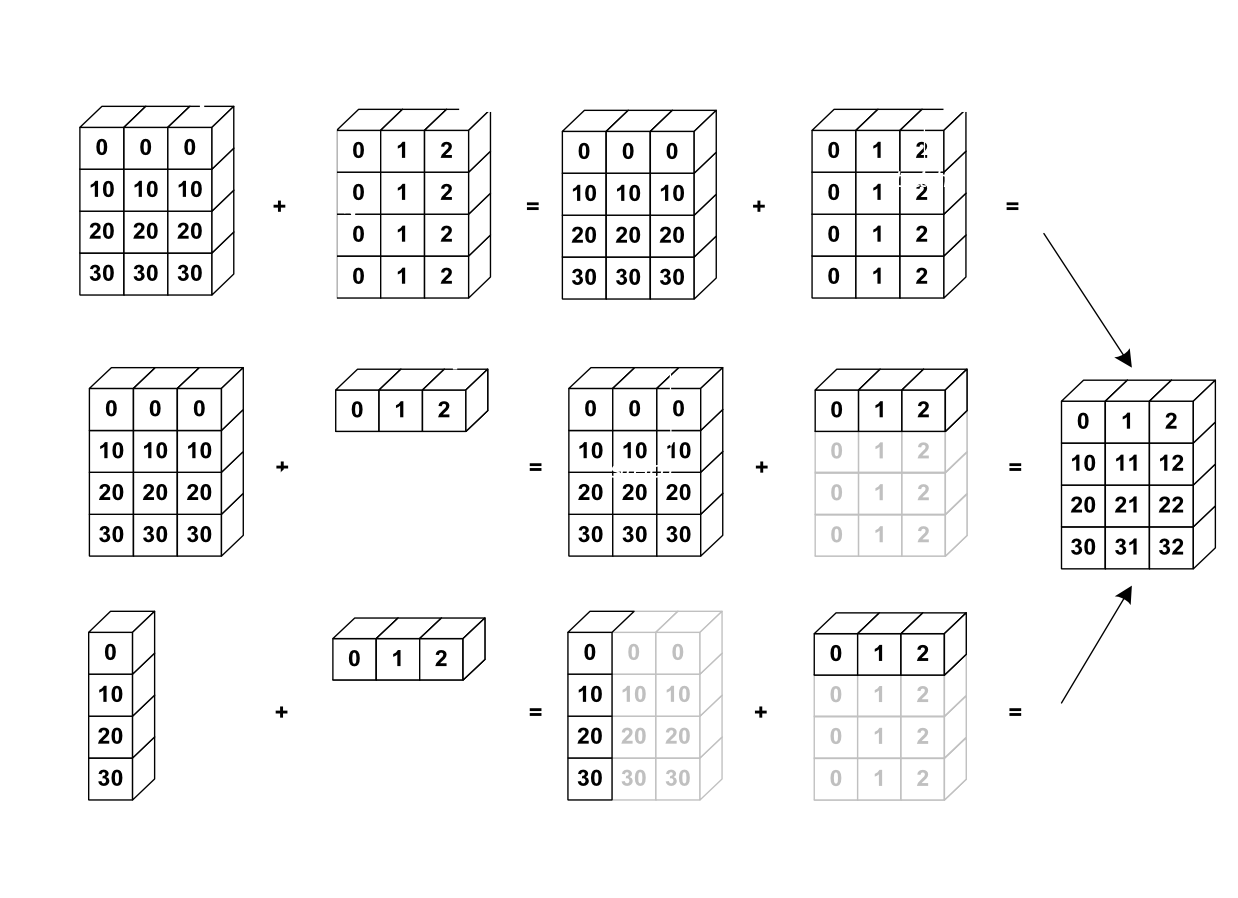

In [72]:
# Esempio di np.tile:
arr = np.array([[1, 2], 
                [3, 4]])
tiled_arr = np.tile(arr, (2, 3))  # mi copia arr in 2 righe e 3 colonne
print("Tiled array: \n", tiled_arr, '\n')

# adding a dimension (useful for linear algebra)
arr = np.array([1, 2, 3])
row_vector = arr[np.newaxis, :]       # aggiungo dimensione riga
print(row_vector.shape) 
# In 2D:
arr_2d = np.array([[1, 2], 
                   [3, 4]])
new_arr = arr_2d[np.newaxis, :, :]
print(new_arr.shape)

# resizing
print ("resizing:", '\n', np.resize(np.arange(4), (9,)), '\n')


display(Image("numpy_broadcasting.png", width=500))

### NUMERI CASUALI CON NUMPY
Con Numpy possiamo generare numeri (pseudo) casuali importando numpy.random con `from numpy import random as npr`. Per ottenere risultati riproducibili possiamo fissare il seed di generazione dei numeri casuali con `npr.seed(numero)`.
* `npr.rand(a,b,c..)`: Genera numeri casuali distribuiti uniformemente tra 0 e 1 in un array di dimensioni axbxc...
* `npr.normal(mean, std, size)`: Genera numeri casuali distribuiti normalmente (a campana di Gauss), con una media e deviazione standard specificabili e forma dell'array data
* `npr.randint(low, high, size)`: Genera numeri interi casuali all'interno di un intervallo specificato.
* `npr.choice(a, size, replace=True, p)`: Seleziona casualmente elementi da un array dato a, potendo specificare quanti prenderne, se sono ammesse ripetizioni e potendo dare un array di probabilità associate agli elementi
* `npr.shuffle(a)`: Mescola in modo casuale gli elementi di un array lungo il primo asse.
* `npr.uniform(low, high, size)`: Genera numeri casuali distribuiti uniformemente tra un minimo e un massimo.
* `npr.exponential(lambda, size)`: Genera numeri casuali secondo una distribuzione esponenziale $\lambda e^{-\lambda x}$
* `npr.multinomial(n, pvals, size)`:  Genera campioni da una distribuzione multinomiale, dove n è il numero di prove e pvals è un array contenente le probabilità di ciascun esito

In [136]:
from numpy import random as npr      # dobbiamo prima importare i numeri casuali
npr.seed(1234)                       # fix seed for reproducible result

x = npr.rand(5,3)                    # matrice di 5x3 numeri reali tra 0 e 1
x = npr.normal(size=1000)            # array di 1000 numeri distribuiti come una gaussiana con media 0 e dev std 1
arr = npr.randint(1000, size=5)      # array formato da 5 numeri interi casuali tra 0 e 1000
print(arr)
arr = npr.randint(1000, size=(2,3))  # matrice formato da 2x3=6 numeri casuali tra 0 e 1000
print(arr)
print(npr.choice(x))                 # cosi scelgo un elemento a caso di x
arr_scelti = npr.choice(x, size=3)   # array di 3 elementi casuali tra quelli di x (anche ripetuti)
print('')

# Esempio: tossing a dice
roll = 1./6
x = npr.multinomial(20000, [roll]*6, size=2)
print ("frequencies of 6-faces dice tossing (two players):",'\n', x)

[429 799 128 289 929]
[[993 642 964]
 [580 668 714]]
0.24370865185047313

frequencies of 6-faces dice tossing (two players): 
 [[3397 3308 3326 3275 3318 3376]
 [3308 3277 3386 3347 3284 3398]]


# MATPLOTLIB
É una libreria permette di rappresentare grafici di dati ecc

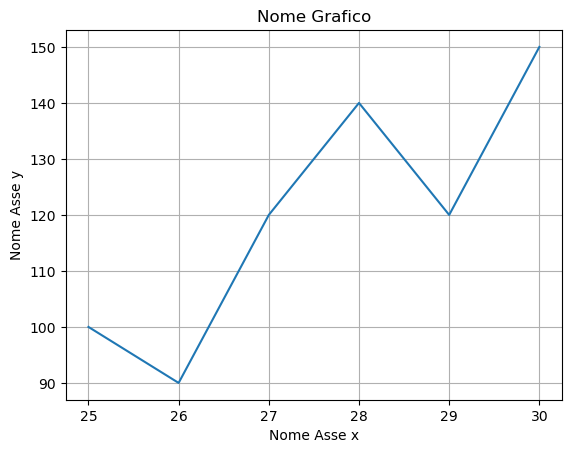

In [2]:
from matplotlib import pyplot as plt

x = [25,26,27,28,29,30]
y = [100,90,120,140,120,150]

plt.plot(x,y)                     # plottiamo i dati x e y in un grafico
plt.title('Nome Grafico')
plt.xlabel('Nome Asse x')
plt.ylabel('Nome Asse y')
plt.grid()                        # cosi aggiungo una griglia al grafico
plt.savefig('nome_grafico.png')   # cosi salvo il grafico come png
plt.show()                        # mostriamo a schermo il plot

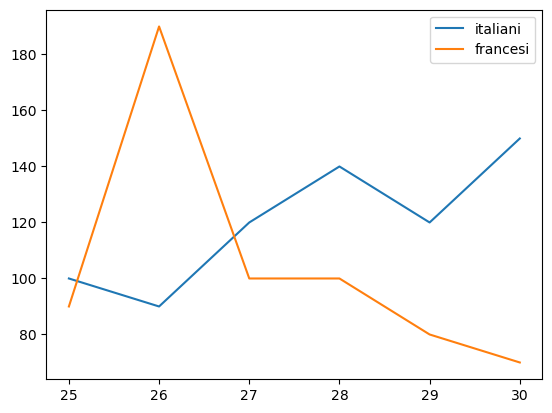

In [5]:
# Posso anche plottare piu set di dati nello stesso grafico:
y_1 = [90,190,100,100,80,70]
plt.plot(x,y)
plt.plot(x,y_1)
plt.legend(['italiani', 'francesi'])         # legenda per i colori delle linee nel grafico
plt.show()

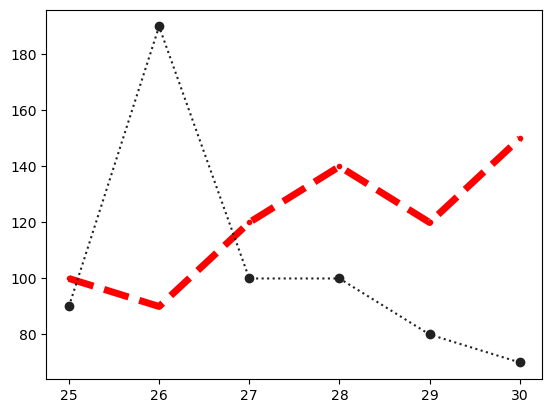

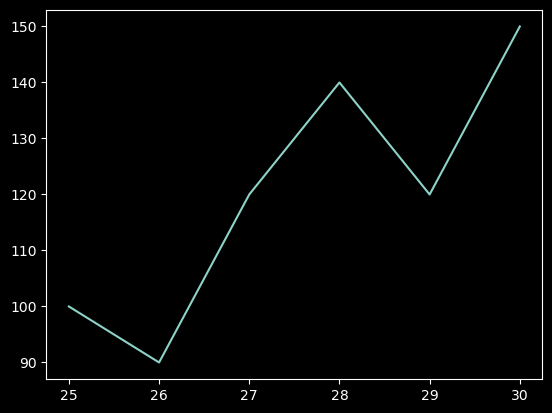

In [6]:
# Ma posso inserire la legenda direttamente nel plot, insieme ad altri marker, colori, tratteggio, ecc:
plt.plot(x, y, label='italiani', color='red', linewidth=5, linestyle='--', marker='.')
plt.plot(x, y_1, label='francesi', color='#212121', linestyle='dotted', marker='o')     # il marker 'o' fa il punto dove c'é il dato
plt.show()

# Esistono stili prefissati, visualizzabili con 'print(plt.style.available)', e si usano con:
plt.style.use('dark_background')          # stile con sfondo scuro (occhio che rimane per tutti i grafici successivi!!!)
plt.plot(x,y)              # plottiamo i dati x e y in un grafico
plt.show()

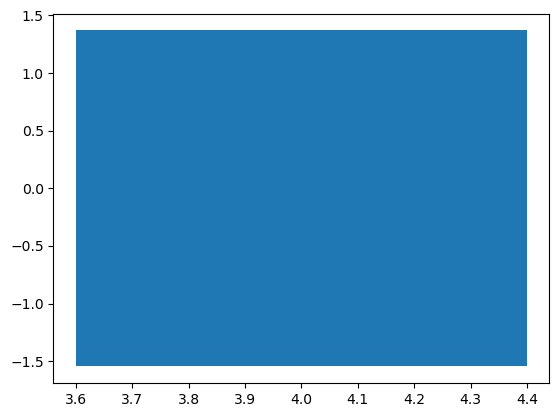

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (50,).

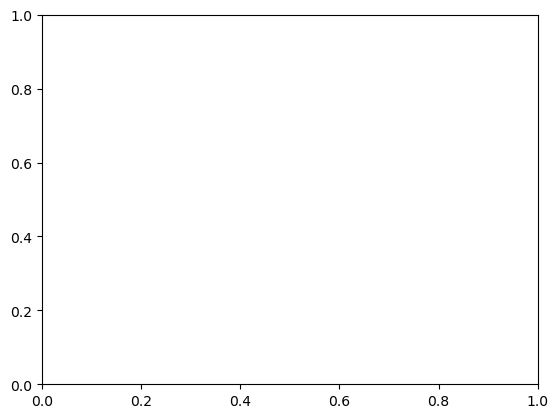

In [29]:
# Si possono fare grafici a barre (istogrammi), scrivendo 'plt.bar' al posto di 'plt.plot':
plt.bar(x,y)    
plt.show()

# per plottare due istogrammi affiancati sfruttiamo la larghezza degli istogrammi affiancandoli:
index = np.arange(6)                             # indici interi da 0 a 5
w_histo=0.3                                      # nuova misura che useró per restringere istogrammi
plt.bar(index, y, width=w_histo)                 # plotto i dati y sugli indici interi (per ora)
plt.bar(index + w_histo, y_1, width=w_histo)     # con 'index + w_histo' traslo il secondo istogramma cosi lo affianco al primo, ma per ora é decentrato
plt.xticks(index + w_histo/2, x)                 # riposiziono al centro gli istogrammi, e rinomino gli xticks con i miei dati x cosí sembrano plottati sugli x
plt.show()
# con 'barh' faccio istogrammi in orizzontale

# Per riempire l'area sotto il grafico si usa 'plt.fill_between()':
plt.plot(x,y)
plt.fill_between(x,y, alpha=0.5)             # con alpha gestisco l'opacitá
plt.show()

# possiamo anche limitare la zona colorata usando 'where' tipo con  ' plt.fill_between(x,y, where=(y>120) )  '
# Per fare ISTOGRAMMI raggruppando le classi di dati (bins) si usa 'plt.hist':
x= [12,13,16,20,27,30,34,35,36,38,40,42]
classi = [10,20,30,40,50]         # definisco i 5 estremi delle mie 4 classi (10-20, 20-30, 30-40, 40-50)
plt.hist(x, bins=classi)          # raggruppo i dati in 4 classi (bins) che ho definito io
# with 'density=True' i renormalize the hystogram area to 1
plt.axvline(32)                   # aggiungo manualmente una linea verticale par x=32 (utile tipo per mostrare la media ecc)
plt.show()

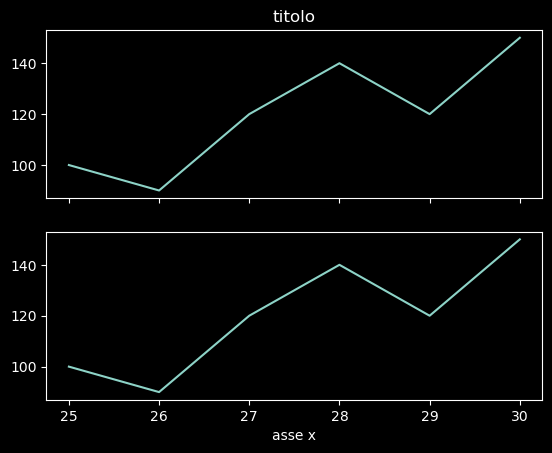

In [8]:
# Per lavorare con piú grafici (axes) in una finestra (figure):
x = [25,26,27,28,29,30]
y = [100,90,120,140,120,150]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)          # creiamo una finestra con 2 grafici chiamati ax1 e ax2 (disposti su 2 righe, 1 colonna)
ax1.plot(x,y)                                                          # con 'sharex' usiamo un solo asse x per entrambi i grafici
ax2.plot(x,y)
ax1.set_title('titolo')                                  # NOTA: con la sintassi degli axes devo aggiungere 'set_'
ax2.set_xlabel('asse x')
plt.show()
# per creare piú finestre basta definire piú figures allo stesso modo
# fig1, (ax1, ax2, ..) = plt.subplots(...)
# fig2, (ax10, ax11, ..) = plt.subplots(...)
# in 'plt.show()' é sottintesa l'opzione 'block=True', cioé 'plt.show(block=True)'
#     ció fa sì che il grafico venga visualizzato in modo sincrono (bloccante), cioé il codice attenderà che la finestra del grafico venga chiusa prima di continuare l'esecuzione del programma

# Per fare GRAFICI A DISPERSIONE si usa 'plt.scatter', ai quali si possono applicare soliti stili ecc

# Per GRAFICI A TORTA si usa 'plt.pie()', ai quali si possono applicare soliti stili ecc

La funzione plt.axhline(y=0) in Matplotlib traccia una linea orizzontale sul grafico a una posizione specificata sull'asse y, similmente axvline

### 2D PLOT
La funzione `pyplot.imshow()` serve per visualizzare array 2D sotto forma di immagini. È uno strumento utile per rappresentare graficamente matrici o funzioni valutate su una griglia. (NOTA: Per visualizzare la legenda dei colori va aggiunta con `plt.colorbar()`).

The syntax is: 
`imshow(X, cmap, aspect, extent)
`

I parametri principali sono:

* X: L'array 2D (come una matrice numpy) da visualizzare. Ogni valore in X viene mappato a un colore in base alla colormap specificata.
* cmap: Specifica la mappa di colori da utilizzare. Esempi: 'viridis', 'plasma', 'gray', 'hot'.
* aspect: Controlla il rapporto d'aspetto dei pixel. 'auto': I dati si adattano automaticamente alle dimensioni del grafico. 'equal': I pixel sono rappresentati in proporzioni corrette.
* extent: Specifica i limiti dell'immagine (le coordinate lungo x e y). Forma: [x_min, x_max, y_min, y_max].

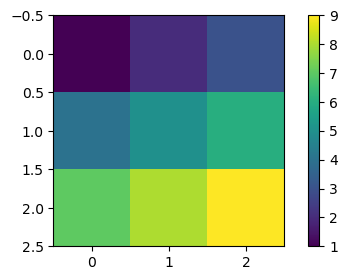

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Creiamo una matrice 2D semplice
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

plt.figure(figsize=(6,3))
# Visualizziamo la matrice con imshow
plt.imshow(data, cmap='viridis')
plt.colorbar()  # Aggiunge una barra dei colori

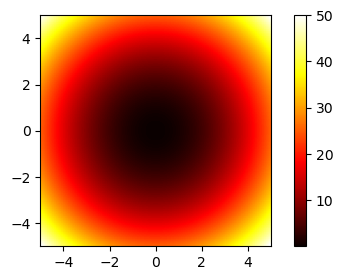

In [16]:
# Creazione di una griglia di punti (X, Y)
x = np.linspace(-5, 5, 100)  # Valori di x da -5 a 5
y = np.linspace(-5, 5, 100)  # Valori di y da -5 a 5
X, Y = np.meshgrid(x, y)     # Griglia 2D

# Calcolo del paraboloide Z = X^2 + Y^2
Z = X**2 + Y**2

plt.figure(figsize=(6,3))
# Visualizzazione con imshow
plt.imshow(Z, extent=[-5, 5, -5, 5], cmap='hot')
plt.colorbar()  # Barra dei colori

# SCIPY
The `scipy.optimize` module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

The `scipy.interpolate` is useful for interpolating.

## INTERPOLATION

`scipy.interpolate` is useful for fitting a function from experimental data and thus evaluating points where no measure exists. With `interp1d` we interpolate in 1 dimension, with `griddata` in 2 dimensions

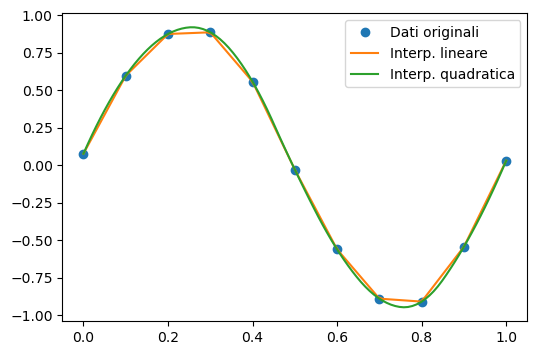

Valore teorico sin(x): 1.0    linear prediction: 0.88235    cubic prediction: 0.9209538364593088


In [3]:
from scipy.interpolate import interp1d

x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.0789, 0.5989, 0.8768, 0.8879, 0.5583, -0.0278, -0.5597, -0.8881, -0.9078,
 -0.5416, 0.0322])
# the interpolation can be linear, quadratic, cubic... Con ' fill_value="extrapolate" '  gli dico di estrapolare i punti mancanti
f_lin  = interp1d(x, y, kind='linear',    fill_value="extrapolate")
f_quad = interp1d(x, y, kind='quadratic', fill_value="extrapolate")

# denser interval to plot the interpolating functions
x_new = np.linspace(0, 1, 100)
lin_result = f_lin(x_new)
quad_result = f_quad(x_new)

# Grafico
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o', label='Dati originali')
plt.plot(x_new, lin_result, '-', label='Interp. lineare')
plt.plot(x_new, quad_result, '-', label='Interp. quadratica')
plt.legend()
plt.show()

# checking the punctual results
x=1/4.
print ("Valore teorico sin(x):",np.sin(2 * np.pi * x), 
       "   linear prediction:",f_lin(x),
       "   cubic prediction:", f_quad(x))

ALTERNATIVA per interpolare:
from `scipy.interpolate` we could also use `UnivariateSpline`, useful for more smooth, less rigid interpolation

spline = UnivariateSpline(x, y, s=0, k=3)

Parametri principali:

    x: Array dei valori x (ascisse) dei dati.
    y: Array dei valori y (ordinate) corrispondenti.
    s: Parametro di smoothing.
        s=0: La spline passerà esattamente attraverso i punti (interpolazione pura).
        s > 0: Permette un certo smoothing, non passa esattamente attraverso i punti, ma minimizza una funzione di errore.
    k: Grado della spline (default k=3 per spline cubiche).



## FIT

If we know that the data is sampled from a specific function and we just need to find its parameters, we can do that by least squares curve fitting. 

We write `from scipy import optimize` and use `optimize.curve_fit()`, which has the syntax `params, pcov = curve_fit(f, x, y, p0, sigma, bounds=(a,b))`, where p0 are the initial parameters to try, sigma an array with the uncertainty on each y data, bounds the limits of search of parameters. NOTA: la prima variabile passata dalla funzione e considerata automaticamente la variabile indipendente


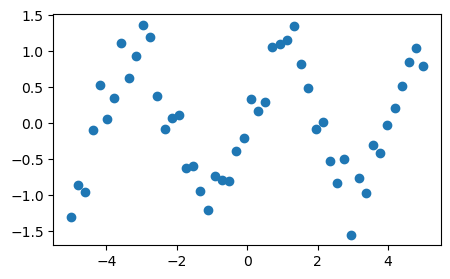

In [4]:
x = np.linspace(-5, 5, num=50)
y = np.sin(1.5 * x) + 0.3*np.random.normal(size=50)

plt.figure(figsize=(5, 3))
plt.scatter(x, y)

La sintassi e

Parametri: [1.02832848 1.52972316]
Covarianza parametri: [[ 0.00285188 -0.0001069 ]
 [-0.0001069   0.00031051]]


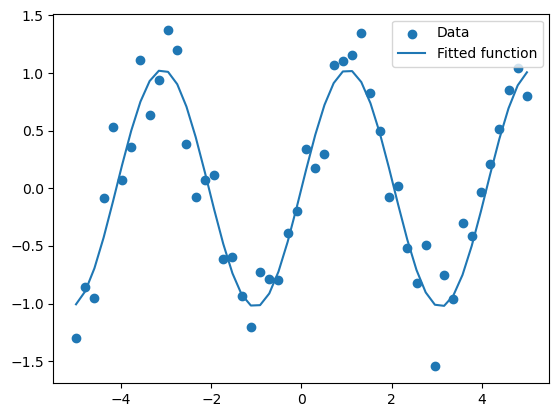

In [5]:
from scipy import optimize

# we define the known function with the two parameters to optimize
def f(x, A, nu):
    return A * np.sin(nu * x)

params, params_covariance = optimize.curve_fit(f, x, y, p0=[2, 2])  
# p0 are the guessed values for the parameters
# covariance matrix (=uncertainty)
print("Parametri:", params)
print("Covarianza parametri:", params_covariance)


plt.scatter(x, y, label='Data')
plt.plot(x, f(x, params[0], params[1]), label='Fitted function')
plt.legend()

## FINDING THE ROOTS
Several methods are there for $f(x): {\rm I\!R} \to {\rm I\!R}$, like Newton-Raphson (`optimize.newton`), Secant method or Brent (`optimize.brentq`).

In case of $f(x): {\rm I\!R}^2 \to {\rm I\!R}$, the `optimize.root` is available, also implementing several methods.

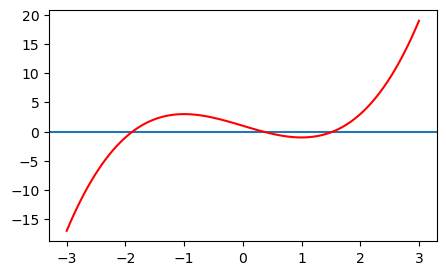

In [6]:
def f(x):
    return x**3-3*x+1

x = np.linspace(-3,3,100)
plt.figure(figsize=(5, 3))
plt.axhline(0)
plt.plot(x, f(x),'r-')

Per newton si scrive `from scipy.optimize import newton` e la sintassi usa: f come funzione di cui trovare lo zero, x0 come punto di partenza per l'algoritmo, args sono gli argomenti (parametri) da passare a f, tol la tolleranza sullo zero, maxiter il numero massimo di iterazioni)

`root = newton(f, x0, args=(), tol=1e-8, maxiter=100)`


In [7]:
from scipy.optimize import newton
print( newton(f,-3)  )
print( newton(f, 0)  )
print( newton(f, 3)  )

-1.8793852415718166
0.34729635533385395
1.5320888862379578


Per Brent si scrive `from scipy.optimize import brentq` e la sintassi usa: f come funzione di cui trovare lo zero, a e b gli estremi di ricerca, args sono gli argomenti (parametri) da passare a f, xtol la tolleranza sullo zero, maxiter il numero massimo di iterazioni)

`root = brentq(f, a, b, args=(), xtol=1.0e-12, maxiter=100)`


In [8]:
from scipy.optimize import brentq
print(  brentq(f, -3, 0)  )
print(  brentq(f, 0, 1)  )
print(  brentq(f, 1,3)  )

-1.8793852415718166
0.3472963553337031
1.532088886237956


Per funzioni vettoriali si scrive `from scipy.optimize import root` e la sintassi usa: f come funzione di cui trovare lo zero, x0 come punto di partenza per l'algoritmo, args sono gli argomenti (parametri) da passare a f, tol la tolleranza sullo zero:

`result = root(f, x0, args=(), tol)`


In [9]:
from scipy.optimize import root

def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1),
            .25*x[0]**2 + x[1]**2 - 1]

solutions = root(f, (0.5, 0.5))
print(solutions)        # stampa resoconto
print(f(solutions.x))   # stampa soluzioni

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.636e-12  1.619e-12]
       x: [ 1.117e+00  8.295e-01]
  method: hybr
    nfev: 21
    fjac: [[-9.978e-01  6.589e-02]
           [-6.589e-02 -9.978e-01]]
       r: [ 8.229e+00 -8.826e-01 -1.726e+00]
     qtf: [-1.495e-08  1.270e-08]
[-1.6360246490876307e-12, 1.6187051699034782e-12]


## MINIMIZZAZIONE
The `minimize_scalar` function will find the minimum of a scalar function, and can also be told to search within given bounds. By default, it uses the Brent algorithm. Its syntax is this, where f is the function for which i search the minimum, bounds are the limit of search, scipy.optimize import minimize_scalar tol is the tolerance:

`result = minimize_scalar(f, bounds, args=(), tol)`

Restituisce un oggetto con le seguenti proprietà principali ([vedi qua](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)):

    result.x: Il valore di x che minimizza f(x).
    result.fun: Il valore minimo di f(x).

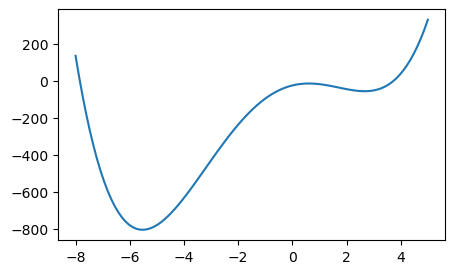

In [10]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

x = np.linspace(-8, 5, 100)
plt.figure(figsize=(5,3))
plt.plot(x, f(x))

In [11]:
optimize.minimize_scalar(f, method='Brent')

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -803.3955308825884
       x: -5.528801125219663
     nit: 11
    nfev: 16

In [12]:
optimize.minimize_scalar(f, method='bounded', bounds=[0, 6])

 message: Solution found.
 success: True
  status: 0
     fun: -54.21003937712762
       x: 2.668865104039653
     nit: 12
    nfev: 12

minimize: È utilizzato per la minimizzazione di funzioni multivariate, ovvero funzioni che dipendono da più variabili (x1,x2,…,xnx1​,x2​,…,xn​).. 

`scipy.optimize.minimize(fun, x0, args=(), method=None, bounds=None, constraints=(), tol=None, options=None)`

Parametri Principali

    fun:
        La funzione da minimizzare. Deve essere definita come fun(x, *args), dove:
            x è un array (o lista) di variabili indipendenti.
            *args è una tupla di argomenti aggiuntivi opzionali.
        Deve restituire un valore scalare.

    x0:
        Il punto iniziale (guess iniziale) da cui parte l'algoritmo di ottimizzazione.
        È un array (o lista) con una dimensione uguale al numero di variabili indipendenti.

    method:
        Il metodo di ottimizzazione da utilizzare. Alcuni esempi:
            'Nelder-Mead': Metodo simplex.
            'BFGS': Gradiente discendente quasi-Newton.
            'L-BFGS-B': Versione a gradiente limitato per problemi con vincoli sui parametri.
            'TNC', 'SLSQP', 'Powell', ecc.
        Se None, viene usato un metodo predefinito (solitamente 'BFGS').

    bounds:
        Una lista di tuple che specificano i limiti (inferiore e superiore) delle variabili.
        Forma: [(x1_min, x1_max), (x2_min, x2_max), ...].
        Necessario per metodi che supportano vincoli sui parametri (es. 'L-BFGS-B').

    constraints:
        Vincoli per l'ottimizzazione, definiti come un dizionario con:
            'type': 'eq' (uguale a 0) o 'ineq' (maggiore o uguale a 0).
            'fun': La funzione che definisce il vincolo.

    jac (opzionale):
        La derivata (o gradiente) della funzione obiettivo.
        Può essere una funzione definita dall'utente o un valore booleano (True significa che il gradiente è calcolato automaticamente).

    options:
        Un dizionario per specificare opzioni aggiuntive come:
            'maxiter': Numero massimo di iterazioni.
            'disp': Mostrare informazioni sull'ottimizzazione (default: False).

    tol:
        Tolleranza per determinare la convergenza.


Output

La funzione restituisce un oggetto di tipo OptimizeResult, che contiene i seguenti attributi principali:

    x: Il valore ottimale delle variabili.
    fun: Il valore della funzione obiettivo al minimo.
    success: Indica se l'ottimizzazione è riuscita (True o False).
    message: Un messaggio che descrive lo stato della terminazione.
    nfev: Numero di valutazioni della funzione.
    njev: Numero di valutazioni del gradiente.

### GLOBAL MINIMUM AMONG LOCAL ONES
When the function oscillates a lot, often the global minimum is not found. To solve this, several intervals needs to be explored. A function that does that, searching for the minimum in a zone and then hops casually, is `from scipy.optimize import basinhopping`, which has the syntax: 

`result = basinhopping(f, x0, niter=100, stepsize=0.5, minimizer_kwargs={'args': (a,b,)})`
Here f is the function to study, x0 is the initial point of search, niter the number of iterations (jumps), stepsize the max size of the steps, minimizer_kwargs is used for giving in the parameters of f (and also other things).

Restituisce un oggetto con le seguenti proprietà principali

    result.x: Il valore di x che minimizza f(x).
    result.fun: Il valore minimo di f(x).

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -1.0
                          x: [ 5.000e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1152
                       njev: 576
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -1.0
                                    x: [ 5.000e+00]
                                  nit: 3
                                  jac: [ 2.235e-08]
                             hess_inv: [[ 3.040e-01]]
                                 nfev: 10
                                 njev: 5

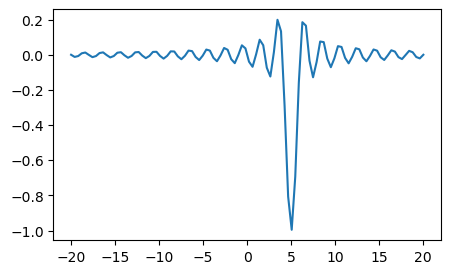

In [22]:
from scipy.optimize import basinhopping

# funzione da minimizzare:
def f(x, offset):
    return -np.sinc(x-offset)
# grafico di f
x = np.linspace(-20, 20, 100)
plt.figure(figsize=(5,3))
plt.plot(x, f(x, 5))

x0 = 0
solution = basinhopping(f, x0, stepsize=1, minimizer_kwargs={'args': (5,)})
solution

### STATISTICS
The module `scipy.stats` contains statistical tools and probabilistic descriptions of random processes.

Con `stats.norm` accediamo alla distribuzione normale (gaussiana).

`norm.pdf(x, mean, devstd)` restituisce il valore calcolato in x della gaussiana di media e deviazione standard specificate

`norm.cdf(x, mean, devstd)` Calcola la funzione di distribuzione cumulativa (CDF), cioè la probabilità che una variabile casuale sia minore o uguale a x

`norm.rvs(mean, devstd, size)` genera campioni casuali di dimensione data

`norm.fit(data)`  stima media e dev std della distribuz normale di un dataset

Mean: -0.011667321422733556     DevStd: 1.005144438361655


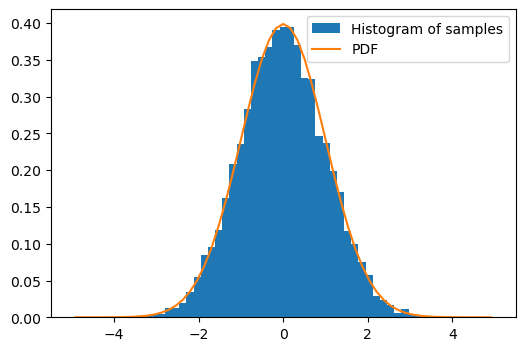

In [32]:
from scipy import stats

samples = npr.normal(size=10000)
bins = np.linspace(-5, 5, 60)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)

plt.figure(figsize=(6, 4))
_,_,_ = plt.hist(samples, bins, label="Histogram of samples", density=True)  # with density true it nrommalize the bins to total area 1
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()

mean, std = stats.norm.fit(samples)
print ("Mean:", mean, "    DevStd:", std)  

### TESTS
With `scipy.stat` I can do many statistical tests:

`ttest_ind(a, b)` Test t di Student per campioni indipendenti.

`chisquare(f_obs, f_exp)` Test chi-quadro. Verifica se i dati osservati corrispondono a quelli attesi 

`linregress(x, y)` Regressione lineare semplice. Restituisce pendenza, intercetta, coefficiente di correlazione e altro.

### INTEGRATION
The most generic integration routine is `scipy.integrate.quad()`, which integrate from a to b (possibly infinite interval), using the quadrature gaussian algorithm. The syntax is: 

`result, error = quad(f, a, b, args=())` with a and b being the inferior and superior limits, args being the optional parameters for the function f

In [33]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)

Per integrare su piu dimensioni (in piu variabili) si usa `scipy.integrate.nquad()`. The syntax is:

`result, error = nquad(f, [(a1,b1),(a2,b2),... ],  args=())` with with the inferior and superior limits of each variable, and args being the optional parameters for the function f

We have to import:
```python
from scipy.integrate import nquad
```

### SOLVING ODE

For integrating ODE (ordinary differential equations) like $\frac{dy}{dt} = f(y,t)$ we use `scipy.integrate.odeint()`. The syntax is:

`sol = odeint( f, y0, t, args=(), tfirst=False, mxstep=500)` where y0 isinitial condition vector, t un array di valori di tempo sui quali calcolare la soluzione, args argomenti da passare a f, mxstep il numero massimo di step; 'sol' contains an array of the values of the solution for each value of time t

Example: let us solve the ODE $\frac{dy}{dt} = -2 y$ between $t = 0 \dots 4$, with the initial condition $y(t=0) = 1$:

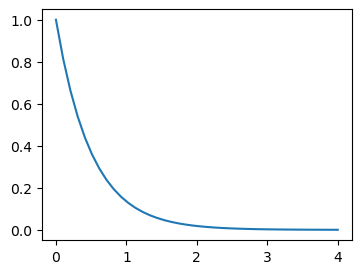

In [37]:
from scipy.integrate import odeint

def calc_derivative(ypos, time):
    return -2 * ypos
time_tic = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_tic)

plt.figure(figsize=(4, 3))
plt.plot(time_vec, y)   # this way we plot the solution!

It is possible to solve systems of 1st order ODE, like:
$$
\left\{
\begin{aligned}
    \frac{dx}{dt} &= x + y \\
    \frac{dy}{dt} &= -x + y
\end{aligned}
\right.
$$

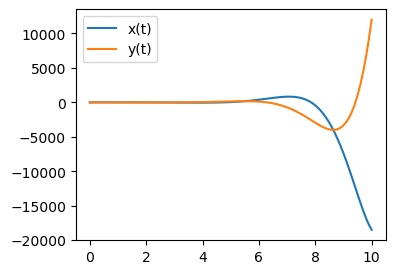

In [41]:
def system(variables, t):
    x, y = variables  # Unpack variables
    dxdt = x + y
    dydt = -x + y
    return [dxdt, dydt]

# Initial conditions
initial_conditions = [1, 0]  # x(0)=1, y(0)=0

# Time points
t = np.linspace(0, 10, 100)

# Solve the system
solution = odeint(system, initial_conditions, t)

# Plot results
plt.figure(figsize=(4, 3))
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.legend()

### SYMBOLIC CALCULATIONS
There is also the possibility of performing symbolic calculations (a la Mathematica). `Sympy` is among the most convinent options.

In [43]:
from sympy import symbols, Function, Eq, dsolve

# Define the symbols
t = symbols('t')  # Time variable
gamma, omega_0 = symbols('gamma omega_0', positive=True, real=True)  # Parameters
x = Function('x')(t)  # Displacement as a function of time

# Define the damped harmonic oscillator equation
damped_eq = Eq(x.diff(t, t) + 2 * gamma * x.diff(t) + omega_0**2 * x, 0)

# Solve the differential equation
solution = dsolve(damped_eq, x)
print("General Solution:")  # this don t need initial conditions
print(solution)   # it prints in latex format!! very useful

General Solution:
Eq(x(t), C1*exp(t*(-gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))) + C2*exp(-t*(gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))))


In [44]:
# Define initial conditions: x(0) = 1, x'(0) = 0
ics = {x.subs(t, 0): 1, x.diff(t).subs(t, 0): 0}

# Solve with initial conditions
solution_with_ics = dsolve(damped_eq, x, ics=ics)
print("\nSolution with Initial Conditions:")
print(solution_with_ics)


Solution with Initial Conditions:
Eq(x(t), (-gamma/(2*sqrt(gamma - omega_0)*sqrt(gamma + omega_0)) + 1/2)*exp(-t*(gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))) + (gamma/(2*sqrt(gamma - omega_0)*sqrt(gamma + omega_0)) + 1/2)*exp(t*(-gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))))


### FAST FOURIER TRANSFORM
Le trasformate di Fourier vengono utilizzate per analizzare frequenze in un segnale temporale,in particolare trasformano un segnale dal dominio del tempo al dominio delle frequenze.
The `scipy.fftpack` module computes fast Fourier transforms ([FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform)) and offers utilities to handle them. The main functions are:
* `scipy.fftpack.fft()` to compute the FFT
* `scipy.fftpack.fftfreq()` to generate the sampling frequencies
* `scipy.fftpack.ifft()` computes the inverse FFT, from frequency space to signal space

We have to import:
```python
from scipy import fftpack
```

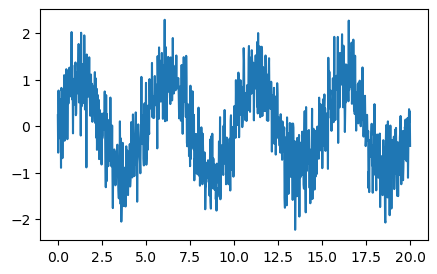

In [49]:
from scipy import fftpack

time_step = 0.02
period = 5.

npr.seed(1234)
time_vec = np.arange(0, 20, time_step)
# let's generate noisy signal:
sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(5, 3))
plt.plot(time_vec, sig, label='Original signal')

Is it close to the generated main frequency? True


[]

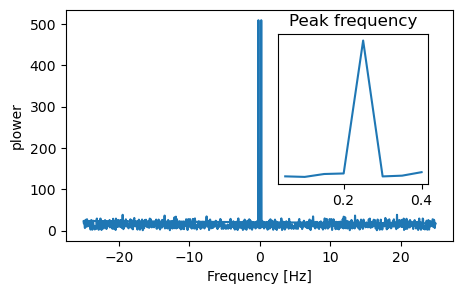

In [52]:
# The FFT of the signal is:
sig_fft = fftpack.fft(sig)   # this could give us something complex!!

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(5, 3))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
print ("Is it close to the generated main frequency?", np.allclose(peak_freq, 1./period))

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

scipy.signal.find_peaks_cwt can also be used for more advanced peak detection

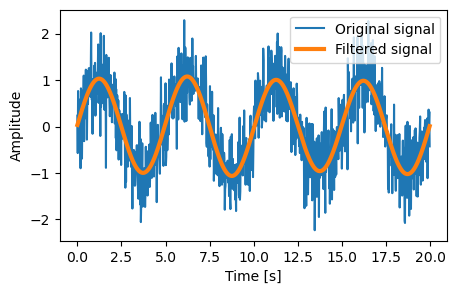

In [55]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(5, 3))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()